<a href="https://colab.research.google.com/github/KavyashreeS31/DLithe-project/blob/main/Dlithe_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
data.shape

(77338, 31)

In [ ]:
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(15468, 31)


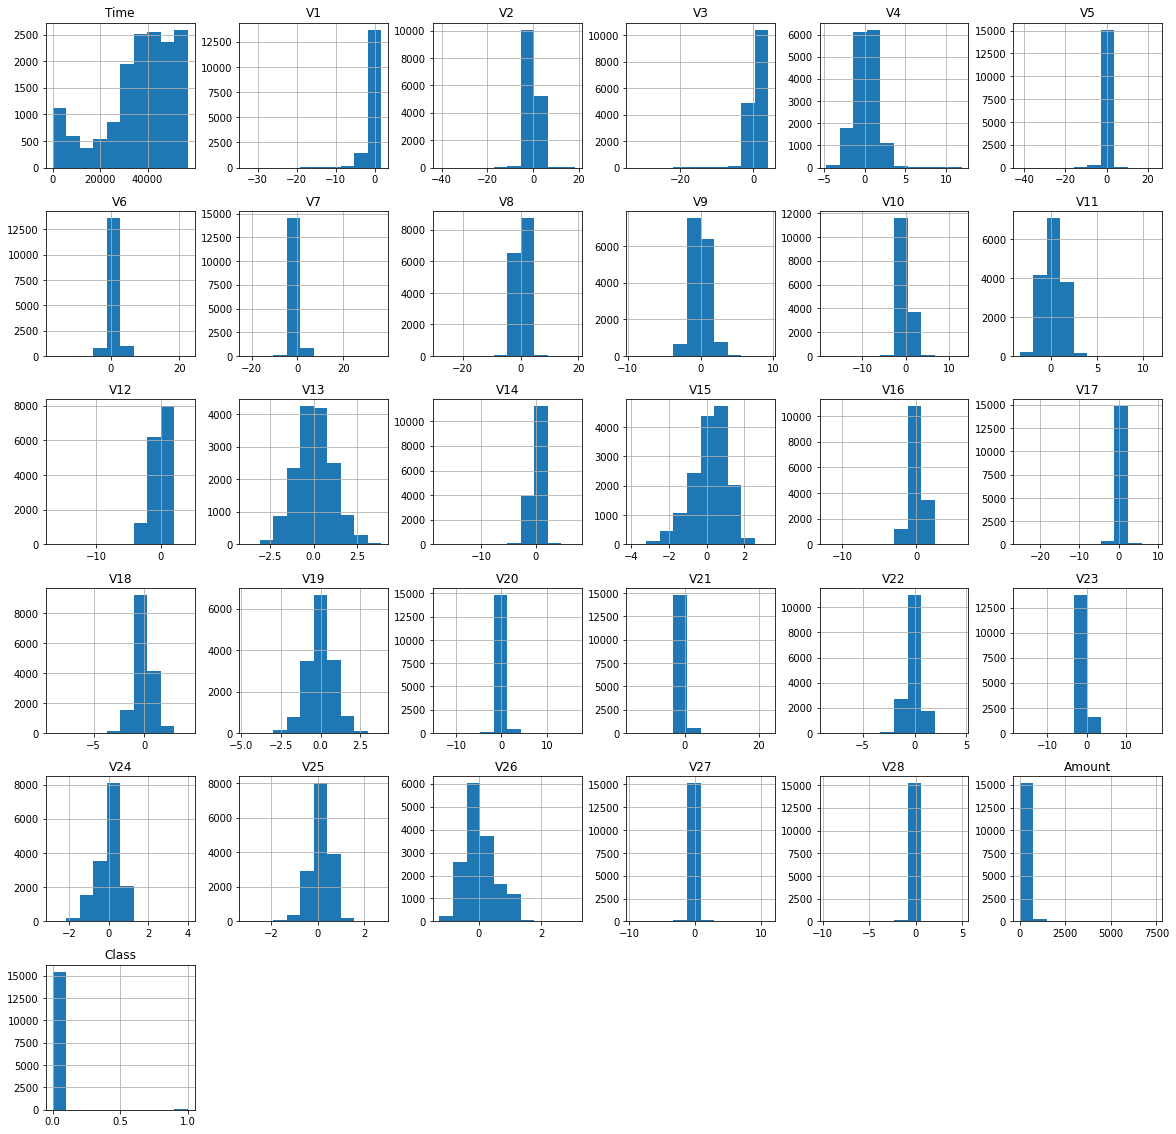

In [ ]:
data.hist(figsize = (20, 20))
plt.show()

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0028526970954356845
Fraud Cases: 44
Valid Cases: 15424


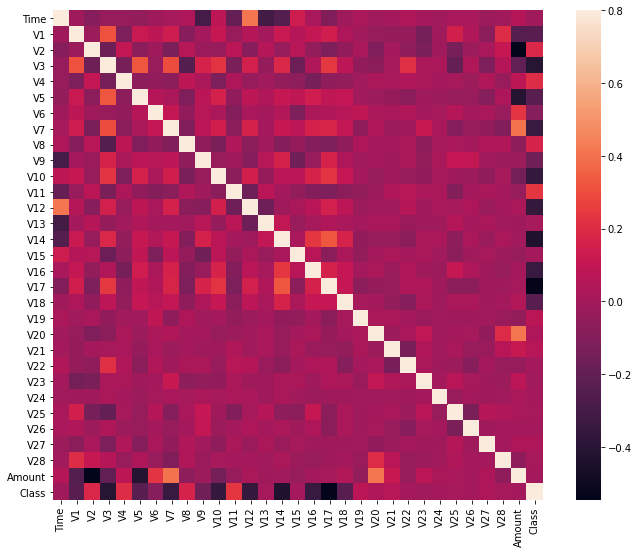

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
# get the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = data[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(15468, 30)
(15468,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [ ]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()
    
    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 43
0.9972200672355831
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15424
         1.0       0.51      0.52      0.52        44

    accuracy                           1.00     15468
   macro avg       0.75      0.76      0.76     15468
weighted avg       1.00      1.00      1.00     15468

Local Outlier Factor: 87
0.9943754848719938
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15424
         1.0       0.02      0.02      0.02        44

    accuracy                           0.99     15468
   macro avg       0.51      0.51      0.51     15468
weighted avg       0.99      0.99      0.99     15468

